**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

**READING DATASET**

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


**DESCRIPTION FOR EACH OF THE COLUMNS IN DATASET**

In [4]:
data.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


**DESCRIPTIVE STATISTICS**

In [5]:
print("Average Ratio of N : {0:.2f}".format(data['N'].mean()))
print("Average Ratio of P: {0:.2f}".format(data['P'].mean()))
print("Average Ratio of K: {0:.2f}".format(data['K'].mean()))
print("Average Tempature : {0:.2f}".format(data['temperature'].mean()))
print("Average Humidity : {0:.2f}".format(data['humidity'].mean()))
print("Average PH value : {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall : {0:.2f}".format(data['rainfall'].mean()))

Average Ratio of N : 50.55
Average Ratio of P: 53.36
Average Ratio of K: 48.15
Average Tempature : 25.62
Average Humidity : 71.48
Average PH value : 6.47
Average Rainfall : 103.46


In [6]:
print("Winter Crops")
print(data[(data['temperature']<20.1)&(data['humidity']>30.1)]['label'].unique())
print("\n")
print("Rainy Crops")

print(data[(data['rainfall']>=200.9)&(data['humidity']>=30.1)]['label'].unique())
print("\n")
print('Summer Crops')
print(data[(data['temperature']>=30.1)&(data['humidity']>=60.1)]['label'].unique())


Winter Crops
['rice' 'maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']


Rainy Crops
['rice' 'papaya' 'coconut']


Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'grapes' 'orange' 'papaya']


**CLUSTERING CROPS

In [7]:
x = data.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']].values
data_x  = pd.DataFrame(x)

In [8]:
#K Means algorithm to perform Clustering analysis
from sklearn.cluster import KMeans
k_means = KMeans(max_iter = 300,n_clusters = 4, n_init = 10,init = 'k-means++')
ymeans = k_means.fit_predict(x)

n = data['label']
ymeans = pd.DataFrame(ymeans)
m = pd.concat([ymeans,n], axis = 1)
m = m.rename(columns = {0: 'cluster'})

#Clusters of each Crops
print("K_Means Cluster Analysis\n")
print("Crops in First Cluster: ", m[m['cluster'] == 0]['label'].unique())
print("\t")
print("Crops in Second Cluster:", m[m['cluster'] == 1]['label'].unique())
print("\t")
print("Crops in Third Cluster:", m[m['cluster'] == 2]['label'].unique())
print("\t")
print("Crops in Forth Cluster:", m[m['cluster'] == 3]['label'].unique())

K_Means Cluster Analysis

Crops in First Cluster:  ['grapes' 'apple']
	
Crops in Second Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
	
Crops in Third Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
	
Crops in Forth Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


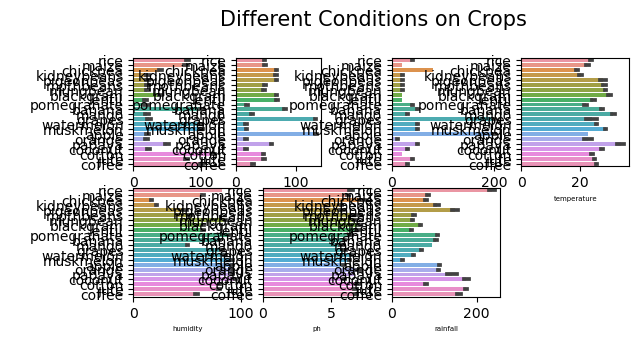

In [9]:
### Data Visualizations
plt.subplot(3,5,1)
plt.xlabel('Nitrogen',fontsize=5)
sns.barplot(data['N'],data['label'])
plt.ylabel(' ')
plt.subplot(3, 5, 2)
plt.xlabel(' Phosphorous',fontsize=5)
sns.barplot(data['P'], data['label'])
plt.ylabel(' ')
plt.subplot(3, 4, 3)
plt.xlabel('Potassium',fontsize=5)
sns.barplot(data['K'], data['label'])
plt.ylabel(' ')
plt.subplot(3, 4, 4)
plt.xlabel('Temperature',fontsize=5)
sns.barplot(data['temperature'], data['label'])
plt.ylabel(' ')
plt.subplot(3, 4, 5)
plt.xlabel('Humidity',fontsize=5)
sns.barplot(data['humidity'], data['label'])
plt.ylabel(' ')
plt.subplot(3, 4, 6)
plt.xlabel('pH value', fontsize = 5)
sns.barplot(data['ph'], data['label'])
plt.ylabel(' ')
plt.subplot(3, 4, 7)
plt.xlabel('Rainfall',fontsize=5)
sns.barplot(data['rainfall'], data['label'])
plt.ylabel(' ')
plt.suptitle('Different Conditions on Crops',fontsize=15)
plt.show()

In [10]:
y=data['label']
x=data.drop(['label'],axis = 1)

In [11]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)
print("Shape of X Train:", train_x.shape)
print("Shape of X Test:", test_x.shape)
print("Shape of Y Train:", train_y.shape)
print("Shape of Y Test:", test_y.shape)

Shape of X Train: (1760, 7)
Shape of X Test: (440, 7)
Shape of Y Train: (1760,)
Shape of Y Test: (440,)


In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

c:\users\sai anuraj-pc\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
#Model Performance
from sklearn.metrics import classification_report
#Classification Report
cr = classification_report(test_y, pred_y)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        18
   blackgram       0.83      0.95      0.88        20
    chickpea       1.00      1.00      1.00        24
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        20
      cotton       0.93      0.93      0.93        14
      grapes       1.00      1.00      1.00        19
        jute       0.88      0.83      0.86        18
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      0.94      0.97        18
       maize       0.93      0.93      0.93        14
       mango       1.00      1.00      1.00        24
   mothbeans       0.92      0.69      0.79        16
    mungbean       0.91      1.00      0.95        21
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        22
      papaya       1.00    

In [14]:
prediction =model.predict((np.array([[90,40,40,20,80,7,200]])))
print("The recommended Crop for Climatic Condition :", prediction)

The recommended Crop for Climatic Condition : ['rice']


In [17]:
prediction =model.predict((np.array([[70,30,20,10,10,100,90]])))
print("The recomended Crop for Given Climatic Condition :", prediction)

The recomended Crop for Given Climatic Condition : ['coffee']
